# 패션 MNIST

- 패션 MNIST 사용

In [1]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = \
  keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


- 60,000 개의 이미지로 구성
- 각 이미지 크기 $ 28 \times 28 $ 크기

In [3]:
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


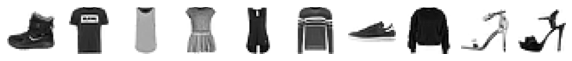

In [4]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [5]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


레이블|0|1|2|3|4|5|6|7|8|9
---|---|---|---|---|---|---|---|---|---|---
패션 아이템|티셔츠|바지|스웨터|드레스|코트|샌달|셔츠|스니커즈|가방|앵클 부츠

In [6]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


- 각 레이블에 6000개의 데이터가 있음

# 로지스틱 회귀로 패션 아이템 분류하기

In [7]:
# 0~1 값으로 정규화
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [8]:
print(train_scaled.shape)

(60000, 784)


- 차원이 합쳐짐

In [9]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


- SGDClassifier 반복 횟수 (max_iter)를 5번으로 지정함

# 인공 신경망

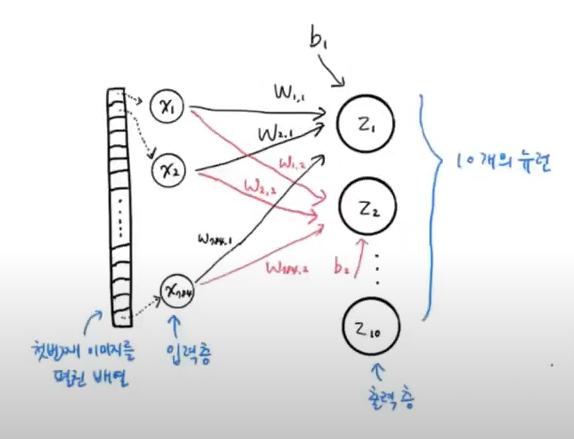

- 입력층 출력층
  - 출력층 : z1 ~ z2까지 계산하고 신경망의 최종 값을 만듦


- z를 계산하는 단위를 뉴런이라고 함
- 뉴런 대신 **유닛**이라고도 부름


- x1~ x784까지를 입력층이라고 부름

- Deep Learning : 심층 신경망(deep neural network, DNN)을 딥러닝이라고 부름
  - 심층 신경망은 여러 개의 층을 가진 인공 신경망을 뜻함

# 인공 신경망으로 모델 만들기

- 인공 신경망에서는 교차 검증을 잘 사용하지 않고 검증 세트를 별도로 덜어내어 사용함
1. 딥러닝 분야의 데이터셋은 충분히 크기 때문에 검증 점수가 안정적임
2. 교차 검증을 수행하기에는 훈련 시간이 너무 오래 걸림

In [10]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [12]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [13]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


- 케라스의 레이어 패키지 안에는 다양한 층이 준비되어 있음
- 가장 기본이 되는 층은 **밀집층**임
---
- 뉴런이 모두 연결하고 있는 층을 **완전 연결층 (fully connected layer)**이라고 부름
- 케라스의 밀집층을 만들어 보자

In [14]:
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

- 10은 뉴런 개수
- activation은 뉴런의 출력에 적용할 함수
- input_shape은 입력의 크기

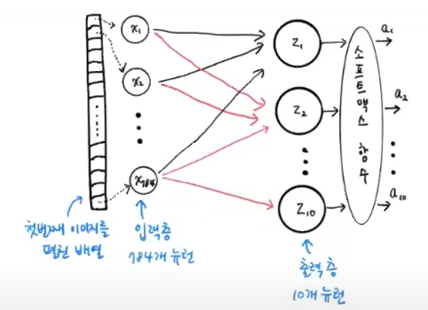

In [15]:
model = keras.Sequential(dense)

- 절편이 뉴런마다 더해진다는 것을 꼭 기억할 것!
- **활성화 함수 (activation function)**

# 인공 신경망으로 패션 아이템 분류하기

- 설정 단계는 compile()로 설정 가능
  - 손실 함수의 종류 등 꼭 설정해야하는 것을 지정

In [16]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

- 다중 분류에서는 크로스 엔트로피 손실 함수를 사용
- 이중 분류에서는 이진 크로스 엔트로피 손실 함수를 사용

- 이진 분류 : loss = 'binary_crossentropy'
- 다중 분류 : loss = 'categorical_crossentropy'

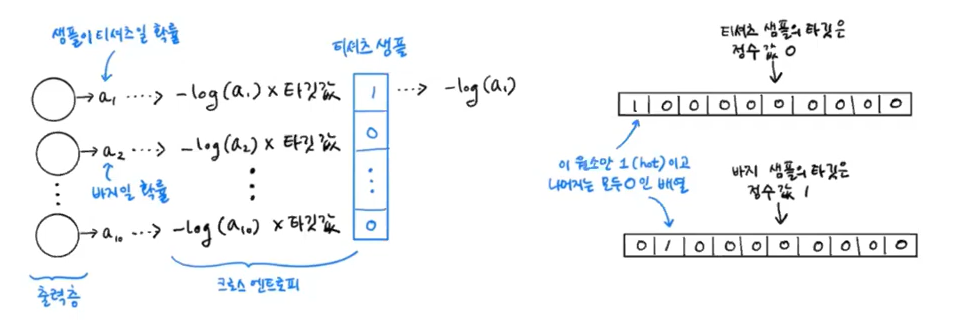

- 타깃값을 해당 클래스만 1이고 나머지는 모두 0인 배열로 만드는 것을 **원-핫 인코딩**이라고 부름

In [17]:
print(train_target[:10])

[7 3 5 8 6 9 3 3 9 9]


- 타깃값을 원-핫 인코딩 하지 않고도 텐서플로에서는 그냥 사용가능
- 정수로된 타깃값을 사용해 크로스 엔트로피 손실을 계산하는 것이 **sparse_categorical_corssentropy**

---
- metrics 매개변수에 정확도 지표를 넣어 'accuracy'를 지정함
- 훈련 반복 횟수를 epochs 매개변수로 지정

In [18]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6080 - accuracy: 0.7922
Epoch 2/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4777 - accuracy: 0.8397
Epoch 3/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4556 - accuracy: 0.8481
Epoch 4/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4442 - accuracy: 0.8532
Epoch 5/5
1500/1500 [==============================] - 2s 2ms/step - loss: 0.4369 - accuracy: 0.8544


In [19]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.8461


[0.4562598764896393, 0.8460833430290222]